In [59]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

In [1]:
#Enter Twitter API credentials

In [2]:
import tweepy #https://github.com/tweepy/tweepy
import csv

def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method

    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    

    alltweets = []

    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print "getting tweets before %s" % (oldest)

        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)

        #save most recent tweets
        alltweets.extend(new_tweets)

        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

        print "...%s tweets downloaded so far" % (len(alltweets))

    #transform the tweepy tweets into a 2D array that will populate the csv	
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
    
    #write the csv
    with open('%s_tweets.csv' % screen_name, 'wb') as f:
        writer = csv.writer(f)
        writer.writerow(["id","created_at","text"])
        writer.writerows(outtweets)
    
    pass


if __name__ == '__main__':
    get_all_tweets("houseofcoates")

getting tweets before 775332124329115647
...400 tweets downloaded so far
getting tweets before 763183849761304580
...600 tweets downloaded so far
getting tweets before 752530214886989823
...800 tweets downloaded so far
getting tweets before 716452399217512448
...999 tweets downloaded so far
getting tweets before 692820247041175551
...1199 tweets downloaded so far
getting tweets before 648212614904971264
...1399 tweets downloaded so far
getting tweets before 614153026669051903
...1599 tweets downloaded so far
getting tweets before 591092016660017151
...1799 tweets downloaded so far
getting tweets before 561710638280749056
...1999 tweets downloaded so far
getting tweets before 540154417425940479
...2199 tweets downloaded so far
getting tweets before 523965275377782783
...2399 tweets downloaded so far
getting tweets before 504721527787749375
...2599 tweets downloaded so far
getting tweets before 478283092592189440
...2799 tweets downloaded so far
getting tweets before 447221528850358271
.

After obtaining the CSV file, we proceed to extract the data

![Image](Images/fig1.jpg)

![Image](Images/fig2.jpg)

In [56]:
import pandas as pd
import numpy as np
import datetime
import matplotlib

In [16]:
test = pd.read_csv('houseofcoates_tweets.csv')

In [81]:
date_time_list = []
for i,ele in enumerate(test.iloc[:,2]):
    if 'Someone' in ele:
        if 'off' not in ele: 
            date_time_list.append(test.iloc[i]['created_at'])
    elif 'someone' in ele:
        if 'off' not in ele: 
            date_time_list.append(test.iloc[i]['created_at'])
    elif 'welcome' in ele:
        date_time_list.append(test.iloc[i]['created_at'])
    elif 'now on' in ele:
        date_time_list.append(test.iloc[i]['created_at'])
time = pd.to_datetime(date_time_list)

dates = []
hours = []
for ele in time:
    dates.append(ele.date())
    hours.append(ele.time())
print dates[0],hours[0]

2016-09-28 16:43:16


<h1>When something was switched on in the smart home</h1>

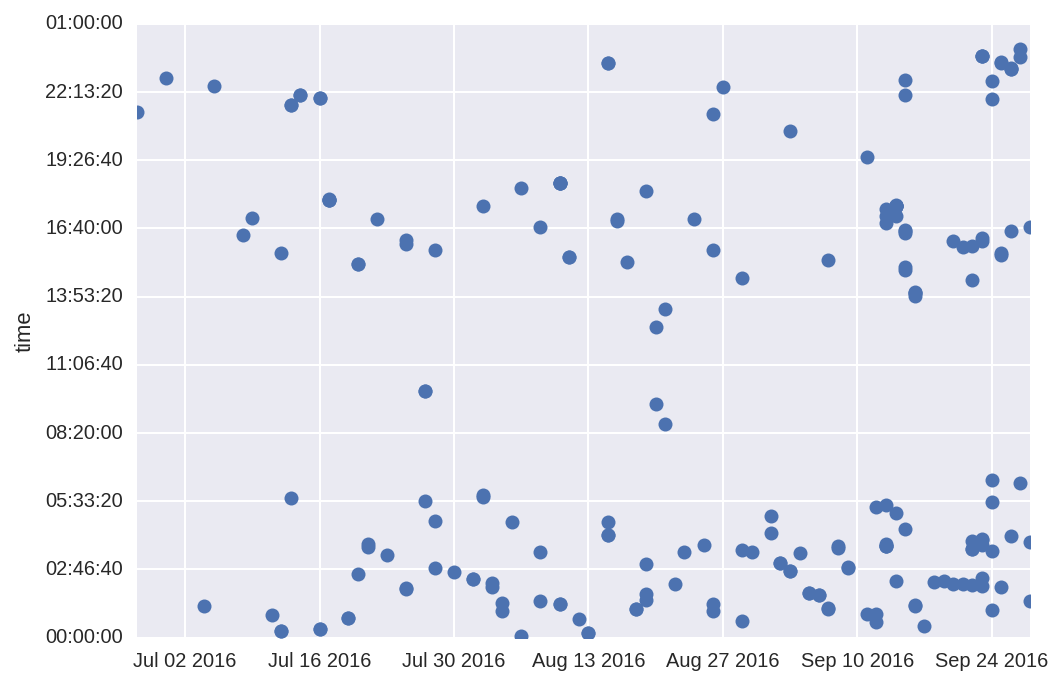

In [82]:
dates2 = matplotlib.dates.date2num(dates)
matplotlib.pyplot.plot_date(dates[:200], hours[:200])

<h1>When something is switched off</h1>

2016-09-28 14:06:48


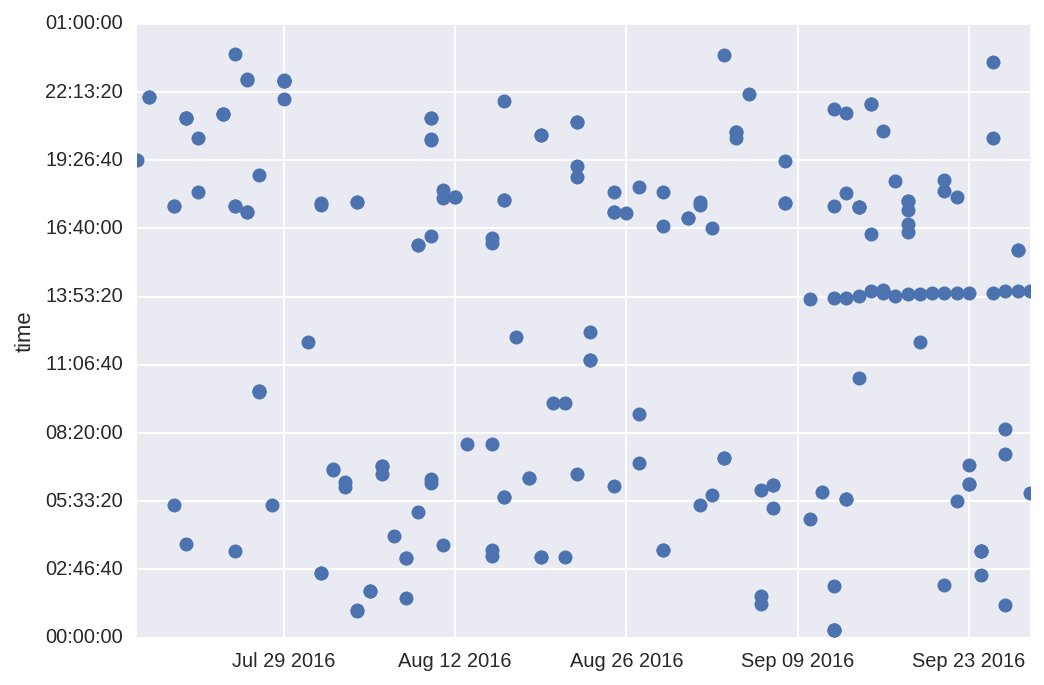

In [79]:
date_time_list = []
for i,ele in enumerate(test.iloc[:,2]):
    if 'off' in ele:
        if 'roomba' not in ele:
            date_time_list.append(test.iloc[i]['created_at'])
time = pd.to_datetime(date_time_list)

dates = []
hours = []
for ele in time:
    dates.append(ele.date())
    hours.append(ele.time())
print dates[0],hours[0]

dates2 = matplotlib.dates.date2num(dates)
matplotlib.pyplot.plot_date(dates[:200], hours[:200])